# Star Wars Espisode 1 Data Clean

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import json
from utils import parsing

## Cleaning Raw Data



```
ANAKIN: There isn't a droid made that can out fly you, Master, and no other way to get to the Chancellor . . .

OBI-WAN: Look out, four droids inbound . . .
```

### Episode 1:The Phantom Menace

In [2]:
filename = './data/01_star_wars_raw.txt'

with open(filename, 'r') as raw_file:
    raw_lines_ep1 = raw_file.readlines()

print(f'Lines {len(raw_lines_ep1)}')

Lines 4230


In [3]:
paragraphs_ep1 = parsing.extract_paragraphs(raw_lines_ep1)       
for p_num, content in paragraphs_ep1.items():
    print(f'****** {p_num} ({len(content)}) *****')
    print(content['lines'])
    if p_num > 20:
        break
    

****** 1 (1) *****
['Star Wars: Episode 1:The Phantom Menace']
****** 2 (1) *****
[]
****** 3 (1) *****
[]
****** 4 (1) *****
['TITLE CARD : A long time ago in a galaxy far, far away....']
****** 5 (1) *****
['A vast sea of stars serves as the backdrop for the main title, followed by', 'a roll up, which crawls up into infinity.']
****** 6 (1) *****
['EPISODE 1 THE PHANTOM MENACE']
****** 7 (1) *****
['Turmoil has engulfed the Galactic Republic. The taxation of trade routes to', 'outlaying star systems is in dispute.', 'Hoping to resolve the matter with a blockade of deadly battleships, the', 'greedy Trade Federation has stopped all shipping to the small planet of', 'Naboo.', 'While the congress of the Republic endlessly debates this alarming chain of', 'events, the Supreme Chancellor has secretly dispatched two Jedi Knights,', 'the guardians of peace and justice in the galaxy, to settle the', 'conflict.....']
****** 8 (1) *****
['PAN DOWN to reveal a small space cruiser heading TOWARD 

In [4]:
save_json = True
if save_json:
    filename = './output/paragraphs_ep1.json'
    with open(filename, 'w') as json_file:
        json.dump(paragraphs_ep1, json_file)

In [5]:
character_lines_ep1 = parsing.parse_paragraph_sep(paragraphs_ep1)
        

In [6]:
df_dict = parsing.build_dialogue_dict(character_lines_ep1)
    

In [7]:
df = pd.DataFrame.from_dict(df_dict)
print(f'Shape episode 3: {df.shape}')
df.head()

Shape episode 3: (435, 3)


,Paragraph,Character,Dialogue
0,4,TITLE CARD,"A long time ago in a galaxy far, far away...."
1,12,QUI-GON,(off screen voice) Captain.
2,14,CAPTAIN,"Yes, sir?"
3,16,CAPTAIN,(cont'd) With all due respect for the Trade Fe...
4,22,PK-4,They must be important if the Viceroy sent one...


In [8]:
df['Character'] = df['Character'].str.strip()
df['Character'].unique()

array(['TITLE CARD', 'QUI-GON', 'CAPTAIN', 'PK-4', 'TC-14', 'EG-9',
       'OBI-WAN', 'NUTE', 'TC14', 'OWO-1', 'RUNE', 'P-59', 'TEY HOW',
       'AMIDALA', 'PALPATINE', 'CAPT', 'JAR JAR', 'BOSS NASS',
       'BATTLE DROID 3B3', 'BIBBLE', 'GUARD DROID', 'RIC OLIE',
       'DARTH SIDIOUS', 'WATTO', 'ANAKIN', 'PADME', 'VENDOR', 'SEBULBA',
       'JIRA', 'SHMI', 'THREEPIO', 'DARTH MAUL', 'KITSTER', 'FODE',
       'JABBA', 'FODE BEED', 'WALD', 'OOM-9', 'YODA', 'GUARD', 'LOTT DOD',
       'AKS MOE', 'MAS AMEDDA', 'BAIL ORGANA', 'ASSEMBLY', 'VALORUM',
       'MACE WINDU', 'PANAKA', 'GUNGAN LOOKOUT', 'GENERAL CEEL',
       'FIGHTER PILOT', 'ANAKN', 'SABE', 'BATTLE DROID CAPTAIN',
       'BRAVO TWO'], dtype=object)

In [9]:
non_characters = ['EXT', 'T', 'S', 'INT', 'A', 'H', 'I', 'J','P','B',]

for character in non_characters:
    condition = (df['Character'] == character)
    df.drop(df[condition].index, inplace=True)


In [10]:
replacements = [('BOBA','BOBA FETT'), ('JANGO', 'JANGO FETT',), ( 'MACE', 'MACE WINDU'),
               ('MACE-WINDU', 'MACE WINDU'), ('WINDU', 'MACE WINDU'), ('THREEPIO', 'C-3PO'),
               ('OBI-WAM', 'OBI-WAN'), ('DOOKU', 'COUNT DOOKU')]
for pair in replacements:
    df.loc[df['Character'] == pair[0], 'Character'] = pair[1]

In [11]:
character_list = list(df['Character'].unique())
character_list.sort()
print(character_list)

['AKS MOE', 'AMIDALA', 'ANAKIN', 'ANAKN', 'ASSEMBLY', 'BAIL ORGANA', 'BATTLE DROID 3B3', 'BATTLE DROID CAPTAIN', 'BIBBLE', 'BOSS NASS', 'BRAVO TWO', 'C-3PO', 'CAPT', 'CAPTAIN', 'DARTH MAUL', 'DARTH SIDIOUS', 'EG-9', 'FIGHTER PILOT', 'FODE', 'FODE BEED', 'GENERAL CEEL', 'GUARD', 'GUARD DROID', 'GUNGAN LOOKOUT', 'JABBA', 'JAR JAR', 'JIRA', 'KITSTER', 'LOTT DOD', 'MACE WINDU', 'MAS AMEDDA', 'NUTE', 'OBI-WAN', 'OOM-9', 'OWO-1', 'P-59', 'PADME', 'PALPATINE', 'PANAKA', 'PK-4', 'QUI-GON', 'RIC OLIE', 'RUNE', 'SABE', 'SEBULBA', 'SHMI', 'TC-14', 'TC14', 'TEY HOW', 'TITLE CARD', 'VALORUM', 'VENDOR', 'WALD', 'WATTO', 'YODA']


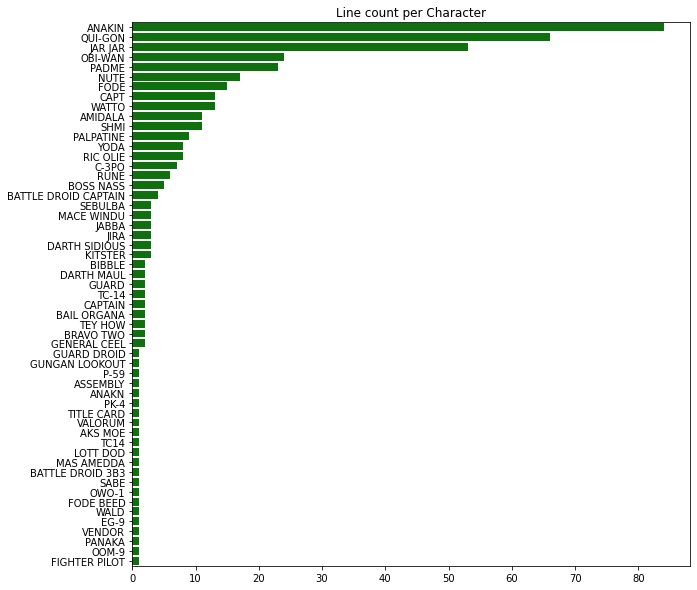

In [12]:
character_series = df['Character'].value_counts()
plt.figure(figsize=(10, 10))
ax = sns.barplot(x=character_series.values, y=character_series.index, color='green')

ax.set_title('Line count per Character')
plt.show()

In [13]:
character_series.describe()

count    55.000000
mean      7.909091
std      15.768314
min       1.000000
25%       1.000000
50%       2.000000
75%       7.500000
max      84.000000
Name: Character, dtype: float64

In [14]:
filename = './data/episode_01.pkl'
df.to_pickle(filename)

### EPISODE 3: REVENGE OF THE SITH

In [15]:
filename = './data/03_star_wars_raw.txt'

with open(filename, 'r') as raw_file:
    raw_lines_ep3 = raw_file.readlines()

print(f'Lines {len(raw_lines_ep3)}')

Lines 4079


In [16]:
paragraphs_ep3 = parsing.extract_paragraphs(raw_lines_ep3)       
for p_num, content in paragraphs_ep3.items():
    print(f'****** {p_num} ({len(content)}) *****')
    print(content['lines'])
    if p_num > 20:
        break

****** 1 (1) *****
['STAR WARS EPISODE 3: REVENGE OF THE SITH SCRIPT']
****** 2 (1) *****
['George Lucas']
****** 3 (1) *****
[]
****** 4 (1) *****
['1 EXT. SPACE']
****** 5 (1) *****
['A long time ago in a galaxy far, far away.']
****** 6 (1) *****
['A vast sea of stars serves as the backdrop for the Main Title, followed by a rollup, which crawls into infinity.']
****** 7 (1) *****
['War! The Republic is crumbling under attacks by the ruthless Sith Lord, Count Dooku. There are heroes on both sides. Evil is everywhere.']
****** 8 (1) *****
['In a stunning move, the fiendish droid leader, General Grievous, has swept into the Republic capital and kidnapped Chancellor Palpatine, leader of the Galactic Senate.']
****** 9 (1) *****
['As the Separatist Droid Army attempts to flee the besieged capital with their valuable hostage, two Jedi Knights lead a desperate mission to rescue the captive Chancellor. . . .']
****** 10 (1) *****
["PAN DOWN to reveal a REPUBLIC ATTACK CRUISER. Continue to P

In [17]:
if save_json:
    filename = './output/paragraphs_ep3.json'
    with open(filename, 'w') as json_file:
        json.dump(paragraphs_ep3, json_file)

In [18]:
character_lines_ep3 = parsing.parse_paragraph_sep(paragraphs_ep3
                                              )

In [19]:
df_dict_ep3 = parsing.build_dialogue_dict(character_lines_ep3)

In [20]:
df_ep3 = pd.DataFrame.from_dict(df_dict_ep3)
print(f'Shape episode 3: {df_ep3.shape}')
df_ep3.head()

Shape episode 3: (1142, 3)


,Paragraph,Character,Dialogue
0,1,STAR WARS EPISODE,REVENGE OF THE SITH SCRIPT
1,15,ANAKIN,"There isn't a droid made that can out fly you,..."
2,16,OBI-WAN,"Look out, four droids inbound . . ."
3,21,OBI-WAN,We've got to split them up.
4,22,ANAKIN,"Break left, fly through the guns on that tower."


In [21]:
df_ep3['Character'] = df_ep3['Character'].str.strip()
df_ep3['Character'].unique()

array(['STAR WARS EPISODE', 'ANAKIN', 'OBI-WAN', 'ODD BALL',
       'CLONE PILOT', 'GENERAL GRIEVOUS', 'CAPTAIN', 'BODYGUARD',
       'SUPER BATTLE DROID R77', 'BATTLE DROID', 'SUPER BATTLE DROID',
       'DROID', 'PALPATINE', 'COUNT DOOKU', 'PILOT', 'ANAKINN', 'MACE',
       'BAIL ORGANA', 'C-3PO', 'PADME', 'SUPER BATTLE DROID G21', 'DARTH',
       'YODA', 'FANG ZAR', 'MON MOTHMA', 'GIDDEAN DANU', 'TERR TANEEL',
       'CAPTAIN TYPHO', 'MOTEE', 'CLONE COMMANDER GREE', 'BANA BREEMU',
       'CHI EEKWAY', 'CLONE COMMANDER CODY', 'JAR JAR', 'WRANGLER',
       'NUTE GUNRAY', 'FANGZAR', 'MACE WINDU', 'CLONE COMMANDER BACARA',
       'AAYLA', 'BLY', 'DARTH SIDIOUS', 'PLO KOON', 'DABTH SIDIOUS',
       'YOUNGLINGS', 'CLONE SERGEANT', 'CLONE COMMANDER APPO',
       'AT-ST CLONE SERGEANT', 'CREATURE', 'CLONE TROOPER', 'ROYAL GUARD',
       'CAPTAIN ANTILLES', 'CLONE CAPTAIN', 'BAIL', 'THREEPIO', 'G-3PO',
       'MAS AMEDDA', 'GUARD', 'RUNE HAAKO', 'DARTH VADER',
       'CLONE COMMANDER THIRE',